In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
def titanic_info():
    df = pd.read_csv("titanic.csv", index_col=0)
    print("\n these are the info:")
    df.info()
    #print("\n these are the 10 first values in the dataset:")
    #head = df.head(10)
    #print(head)
    titanic_fare(df)

In [3]:
def titanic_fare(df):
    fare_head = df['Fare'].head()
    print(fare_head)
    
    print("\n doing the histogram below")
    plt.hist(df["Fare"], bins = 10, color = "purple", edgecolor ="green")
    plt.xlabel("Fare")
    plt.ylabel("nb tickets")
    plt.title("fare tickets for a titanic trip")
    plt.show();
    
    #print("\n doing the boxplot below")

    sns.boxplot(data=df, y='Fare')
    
    print("\n finding the outliers")
    
    q1 = df['Fare'].quantile(.25)
    q3 = df['Fare'].quantile(.75)
    iqr = q3 - q1
    print("\n this is the Interquartile range ", iqr)
    upperfence = q3 + (1.5*iqr)
    print("\n this is the upper fence value", upperfence)
    lowerfence = abs (q1 - (1.5*iqr))
    print("\n this is the lower fence absolute value",lowerfence)
    outliersup = df.loc[df["Fare"] > upperfence]
    print("\n these are the outliers from the upper fence = ", len(outliersup))
    print("\n doing the boxplot below")

    #outlierslow = df.loc[df["Fare"] < lowerfence]
    #print("\n these are the outliers from the lower fence", outlierslow)



 these are the info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64

 doing the histogram below


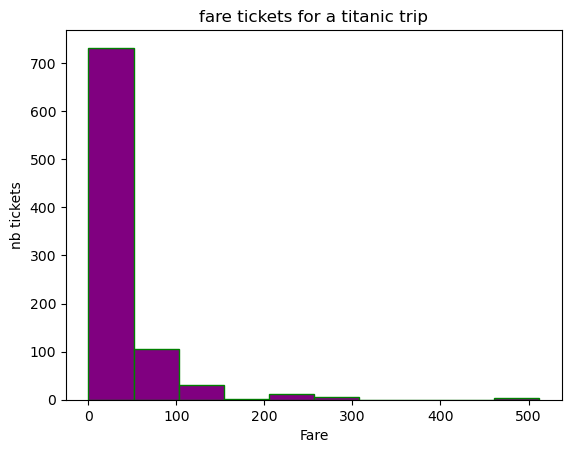


 finding the outliers

 this is the Interquartile range  23.0896

 this is the upper fence value 65.6344

 this is the lower fence absolute value 26.724

 these are the outliers from the upper fence =  116

 doing the boxplot below


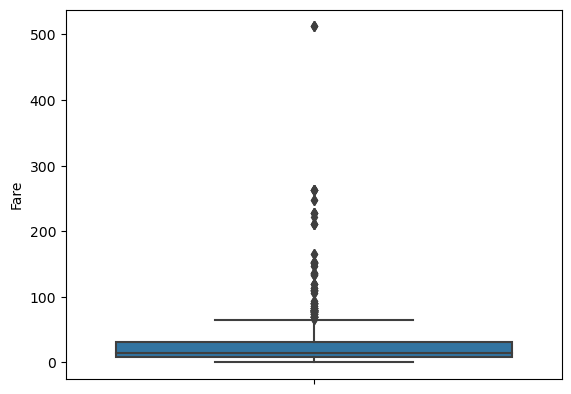

In [4]:
titanic_info()

In [8]:
df = pd.read_csv("titanic.csv", index_col=0)

In [9]:
def gender_fc():
    df = pd.read_csv("titanic.csv", index_col=0)
    
    table = pd.crosstab(df['Survived'],df['Sex'])
    print (table)
    print(" important info about the table below   0 = No; 1 = Yes")
    print (df.groupby('Sex').Survived.mean())
    grouped = df.groupby('Sex').Survived.mean()
    grouped.plot(kind='bar', color = "pink", edgecolor = "blue")
    plt.xlabel("gender")
    plt.ylabel("% of survival")
    plt.title("survival percentage based on their gender for  titanic")
    plt.show()
    
    survivors_data = df[df.Survived==True]
    non_survivors_data = df[df.Survived==False]

    survivors_gender = survivors_data.groupby(['Sex']).size().values
    non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

    gender_categories = ['Female', 'Male']

    f, (ax1) = plt.subplots(1, figsize=(8,4))
    # plot chart for count of survivors by class
    ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', color='blue')
    ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', color='green')
    plt.xticks([0.3, 1.3], gender_categories )
    ax1.set_ylabel("Count")
    ax1.set_xlabel("")
    ax1.set_title("Count of survivors by gender")
    plt.legend(loc='upper left')


Sex       female  male
Survived              
0             81   468
1            233   109
 important info about the table below   0 = No; 1 = Yes
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


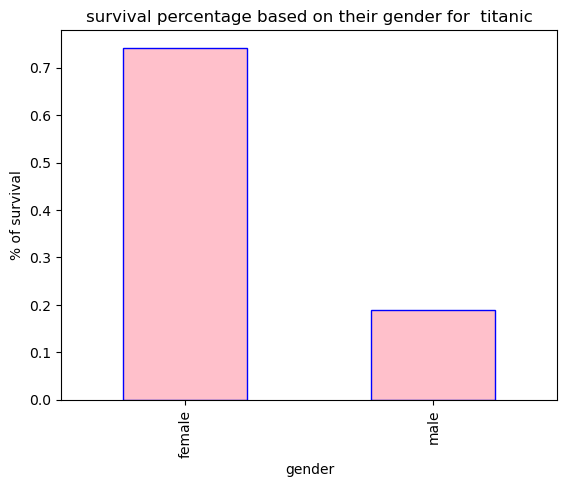

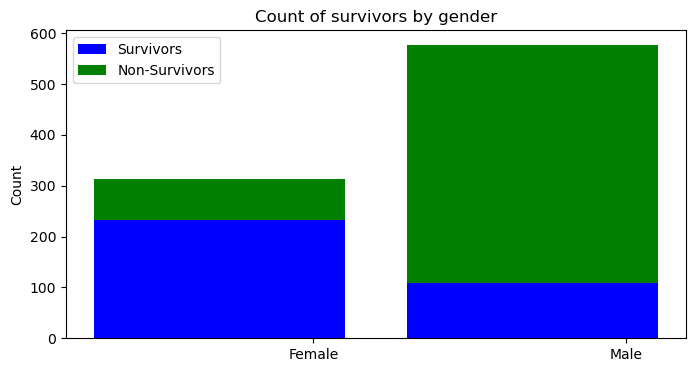

In [10]:
gender_fc()